# Analyse d'une corrélation et du nombre de chomeur

In [155]:
import pandas as pd
import os
from normalizr import Normalizr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [5]:
directory = "/home/brehelin/Documents/Fil Rouge"
os.chdir(directory)

### Approche Communes

In [6]:
chomage_commune = pd.read_excel("chom_dep.xls",sheetname='COM_2013',skiprows=14)
chomage_commune = chomage_commune.drop(chomage_commune.index[0])

resultat_commune = pd.read_excel("resultat_commune.xls",sheetname="Tour 1")

In [7]:
print(chomage_commune.shape)
print(resultat_commune.shape)

#Plus de commune dans le fichier chomage_commune car celui-ci contient les villes des DOM-TOM
#contrairement au fichier résultat_commune 

(38214, 10)
(36791, 45)


In [8]:
chomage_commune = chomage_commune.rename(columns={'Libellé de commune': 'commune',\
                                                  'Département\nen géographie courante':'code_dep',\
                                                 'Commune\nen géographie courante':'nb_commune'})
resultat_commune = resultat_commune.rename(columns={'Libellé de la commune': 'commune',\
                                                    'Code du département':'code_dep',\
                                                   'Code de la commune':'nb_commune'})

chomage_commune = chomage_commune.reset_index(drop=True)
resultat_commune = resultat_commune.reset_index(drop=True)

In [9]:
chomage_commune

,Région en géographie courante,code_dep,nb_commune,Indicateur de stabilité de la commune,Département en géographie 2015,commune,Hommes Actifs ayant un emploi RP2013,Hommes Chômeurs RP2013,Femmes Actifs ayant un emploi RP2013,Femmes Chômeurs RP2013
0,82,01,001,1,01,ABERGEMENT-CLEMENCIAT,137.667,11.8,129.8,15.7333
1,82,01,002,1,01,ABERGEMENT-DE-VAREY,60.5128,0,36.3077,0
2,82,01,003,0,01,AMAREINS,NaN,NaN,NaN,NaN
3,82,01,004,1,01,AMBERIEU-EN-BUGEY,2486.17,260.533,2000.61,367.836
4,82,01,005,1,01,AMBERIEUX-EN-DOMBES,343.36,0,272.668,30.2965
5,82,01,006,1,01,AMBLEON,11.5714,0,15.4286,0
6,82,01,007,1,01,AMBRONAY,466.488,38.9552,451.88,38.9552
7,82,01,008,1,01,AMBUTRIX,164,4,136,12
8,82,01,009,1,01,ANDERT-ET-CONDON,40,8,44,8
9,82,01,010,1,01,ANGLEFORT,211.442,12.4378,161.691,16.5837


In [10]:
for i in range(chomage_commune.shape[0]):
    chomage_commune.loc[i,"top_dom"]=(len(chomage_commune.loc[i,"code_dep"])>2)

#On va calculer le taux de chomage au sens du recensement sur la classe d'age 25-54

chomeur = chomage_commune.groupby(["top_dom"])["Hommes\nChômeurs\nRP2013"].sum() +\
        chomage_commune.groupby(["top_dom"])["Femmes\nChômeurs\nRP2013"].sum()
    
actif = chomage_commune.groupby(["top_dom"])["Femmes\nActifs ayant un emploi\nRP2013"].sum() +\
        chomage_commune.groupby(["top_dom"])["Hommes\nActifs ayant un emploi\nRP2013"].sum()

print("Taux de chomage au sens du RP2013 : %s" % (chomeur/actif) )

Taux de chomage au sens du RP2013 : top_dom
False    0.128583
True     0.433927
dtype: float64


In [114]:
normalizr = Normalizr(language='fr')
#Normalisation des noms de ville
def normalize_columns(data,name_columns):
   
    normalizations = [
        'remove_extra_whitespaces',
        'remove_accent_marks',
        ('replace_punctuation', {'replacement': ' '})
    ]
    
    len_data = data.shape[0]
    
    for i in range(len_data):
        
        try :
            data.loc[i,name_columns] = normalizr.normalize(data.loc[i,name_columns], normalizations).lower()
        except AttributeError:
            
            if data.loc[i,name_columns] == False :
                data.loc[i,name_columns] = normalizr.normalize("Faux", normalizations).lower()
    
    return data

chomage_commune = normalize_columns(chomage_commune,"commune")
resultat_commune = normalize_columns(resultat_commune,"commune")

KeyboardInterrupt: 

In [12]:
resultat_commune.groupby(["Libellé du département"])["Libellé du département"].count()

Libellé du département
AIN                              419
AISNE                            816
ALLIER                           320
ALPES DE HAUTE PROVENCE          200
ALPES MARITIMES                  163
ARDECHE                          339
ARDENNES                         463
ARIEGE                           332
AUBE                             433
AUDE                             438
AVEYRON                          304
BAS RHIN                         527
BOUCHES DU RHONE                 119
CALVADOS                         706
CANTAL                           260
CHARENTE                         404
CHARENTE MARITIME                472
CHER                             290
CORREZE                          286
CORSE SUD                        124
COTE D'OR                        706
COTES D'ARMOR                    373
CREUSE                           260
DEUX SEVRES                      305
DORDOGNE                         557
DOUBS                            594
DROME          

In [13]:
#Normalisation des code de départements sur l'outre mer
resultat_commune.loc[resultat_commune["Libellé du département"]=="LA REUNION","code_dep"] = "974"
resultat_commune.loc[resultat_commune["Libellé du département"]=="GUYANE","code_dep"] = "973"
resultat_commune.loc[resultat_commune["Libellé du département"]=="MARTINIQUE","code_dep"] = "972"
resultat_commune.loc[resultat_commune["Libellé du département"]=="GUADELOUPE","code_dep"] = "971"
#LA REUNION '974'
#GUYANE '973'
#MARTINIQUE '972'
#GUADELOUPE '971'



In [14]:
resultat_commune

,code_dep,Libellé du département,nb_commune,commune,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,...,Voix_Exp_CHEMINADE,Voix_BAYROU,Voix_Ins_BAYROU,Voix_Exp_BAYROU,Voix_DUPONT_AIGNAN,Voix_Ins_DUPONT_AIGNAN,Voix_Exp_DUPONT_AIGNAN,Voix_HOLLANDE,Voix_Ins_HOLLANDE,Voix_Exp_HOLLANDE
0,1,AIN,1,l abergement clemenciat,592,84,14.19,508,85.81,9,...,0.40,54,9.12,10.82,4,0.68,0.80,112,18.92,22.44
1,1,AIN,2,l abergement de varey,215,36,16.74,179,83.26,5,...,0.57,22,10.23,12.64,2,0.93,1.15,39,18.14,22.41
2,1,AIN,4,amberieu en bugey,8205,1698,20.69,6507,79.31,126,...,0.33,543,6.62,8.51,138,1.68,2.16,1691,20.61,26.50
3,1,AIN,5,amberieux en dombes,1152,170,14.76,982,85.24,18,...,0.00,97,8.42,10.06,26,2.26,2.70,195,16.93,20.23
4,1,AIN,6,ambleon,105,17,16.19,88,83.81,1,...,0.00,8,7.62,9.20,0,0.00,0.00,21,20.00,24.14
5,1,AIN,7,ambronay,1702,222,13.04,1480,86.96,29,...,0.34,141,8.28,9.72,34,2.00,2.34,332,19.51,22.88
6,1,AIN,8,ambutrix,549,68,12.39,481,87.61,7,...,0.21,55,10.02,11.60,5,0.91,1.05,125,22.77,26.37
7,1,AIN,9,andert et condon,269,40,14.87,229,85.13,4,...,0.89,27,10.04,12.00,6,2.23,2.67,38,14.13,16.89
8,1,AIN,10,anglefort,681,99,14.54,582,85.46,12,...,0.18,47,6.90,8.25,15,2.20,2.63,137,20.12,24.04
9,1,AIN,11,apremont,255,30,11.76,225,88.24,7,...,0.46,22,8.63,10.09,6,2.35,2.75,37,14.51,16.97


In [55]:
#Normalisation des communes et départment, on les passe en longeur de 3
def normalize_number(data,name_columns):
    long_com = 3

    for x in name_columns :

        for i in range(data.shape[0]):

            data.loc[i,x] = str(data.loc[i,x])
            len_dep = len(data.loc[i,x])
            
            if x == "nb_commune" : 
                if len_dep == 2 :
                    data.loc[i,x] = "0" + data.loc[i,x] 
                if len_dep == 1 :
                    data.loc[i,x] = "00" + data.loc[i,x]
            if x == "code_dep":
                if len_dep == 1 :
                    data.loc[i,x] = "0" + data.loc[i,x]
    return data
        
resultat_commune = normalize_number(resultat_commune,["code_dep","nb_commune"])
        
    

In [56]:
result = pd.merge(resultat_commune,chomage_commune,on=["code_dep","nb_commune"])

In [57]:
result

,code_dep,Libellé du département,nb_commune,commune_x,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,...,Voix_Exp_HOLLANDE,Région en géographie courante,Indicateur de stabilité de la commune,Département en géographie 2015,commune_y,Hommes Actifs ayant un emploi RP2013,Hommes Chômeurs RP2013,Femmes Actifs ayant un emploi RP2013,Femmes Chômeurs RP2013,top_dom
0,01,AIN,001,l abergement clemenciat,592,84,14.19,508,85.81,9,...,22.44,82,1,01,abergement clemenciat,137.667,11.8,129.8,15.7333,False
1,01,AIN,002,l abergement de varey,215,36,16.74,179,83.26,5,...,22.41,82,1,01,abergement de varey,60.5128,0,36.3077,0,False
2,01,AIN,004,amberieu en bugey,8205,1698,20.69,6507,79.31,126,...,26.50,82,1,01,amberieu en bugey,2486.17,260.533,2000.61,367.836,False
3,01,AIN,005,amberieux en dombes,1152,170,14.76,982,85.24,18,...,20.23,82,1,01,amberieux en dombes,343.36,0,272.668,30.2965,False
4,01,AIN,006,ambleon,105,17,16.19,88,83.81,1,...,24.14,82,1,01,ambleon,11.5714,0,15.4286,0,False
5,01,AIN,007,ambronay,1702,222,13.04,1480,86.96,29,...,22.88,82,1,01,ambronay,466.488,38.9552,451.88,38.9552,False
6,01,AIN,008,ambutrix,549,68,12.39,481,87.61,7,...,26.37,82,1,01,ambutrix,164,4,136,12,False
7,01,AIN,009,andert et condon,269,40,14.87,229,85.13,4,...,16.89,82,1,01,andert et condon,40,8,44,8,False
8,01,AIN,010,anglefort,681,99,14.54,582,85.46,12,...,24.04,82,1,01,anglefort,211.442,12.4378,161.691,16.5837,False
9,01,AIN,011,apremont,255,30,11.76,225,88.24,7,...,16.97,82,1,01,apremont,81.8701,0,69.5896,4.09351,False


In [18]:
resultat_commune.shape

(36791, 45)

In [19]:
result.shape
#On recuppère une grande partie des lignes => Approfondir sur les lignes manquantes

(28066, 54)

In [20]:
#On crée une fonction de taux pour simplifier le code

def rate(i,result,default = None):
    
    total_men = float(result.loc[i,"Hommes\nActifs ayant un emploi\nRP2013"]) +\
                       float(result.loc[i,"Hommes\nChômeurs\nRP2013"])
                       
    total_girl = float(result.loc[i,"Femmes\nActifs ayant un emploi\nRP2013"])+\
                   float(result.loc[i,"Femmes\nChômeurs\nRP2013"])
    
        
    
    if default == "men" :
        try :
            number = ( float(result.loc[i,"Hommes\nChômeurs\nRP2013"]) / total_men ) * 100 
        except :
            number = None 
        return number
    elif default == "girl":
        try:
            number = ( float(result.loc[i,"Femmes\nChômeurs\nRP2013"]) / total_girl ) * 100 
        except :
            number = None 
        return  number                  
    else :
        somme_tot = float(result.loc[i,"Hommes\nChômeurs\nRP2013"])+\
                          float(result.loc[i,"Femmes\nChômeurs\nRP2013"])
        try : 
            number = (somme_tot / (total_men + total_girl) ) * 100
        except :
            number = None 
        return number 
    
for i in range(result.shape[0]):
    #On calcule un top dom-tom pour la suite pour lorsque l'on voudra faire des moyennes nationale
    result.loc[i,"top_tom"]=(len(result.loc[i,"code_dep"])>2)
    
    #Calculons le taux de chomage par sexe et pour tout sexe
    #'Hommes\nActifs ayant un emploi\nRP2013', 'Hommes\nChômeurs\nRP2013',
    #'Femmes\nActifs ayant un emploi\nRP2013', 'Femmes\nChômeurs\nRP2013',
    result.loc[i,"chomage_rate_man"] = rate(i=i,result=result,default='man')
    result.loc[i,"chomage_rate_girl"] = rate(i=i,result=result,default='girl')
    result.loc[i,"chomage_rate"] = rate(i=i,result=result)

In [22]:
#calculer le niveau de chomage france et TOM

agrega_chomage = result.groupby(["top_tom"])['Hommes\nActifs ayant un emploi\nRP2013',\
                            'Hommes\nChômeurs\nRP2013',\
                            'Femmes\nActifs ayant un emploi\nRP2013',\
                            'Femmes\nChômeurs\nRP2013'].sum().reset_index()

for i in range(agrega_chomage.shape[0]):
    agrega_chomage.loc[i,"chomage_rate_man"] = rate(i=i,result=agrega_chomage,default='man')
    agrega_chomage.loc[i,"chomage_rate_girl"] = rate(i=i,result=agrega_chomage,default='girl')
    agrega_chomage.loc[i,"chomage_rate"] = rate(i=i,result=agrega_chomage)

agrega_chomage

,top_tom,Hommes Actifs ayant un emploi RP2013,Hommes Chômeurs RP2013,Femmes Actifs ayant un emploi RP2013,Femmes Chômeurs RP2013,chomage_rate_man,chomage_rate_girl,chomage_rate
0,False,6.727690e+06,780464.580917,6.198418e+06,850099.009943,11.201487,12.060679,11.201487
1,True,2.219289e+05,81133.247639,2.170368e+05,109346.061095,30.261467,33.502391,30.261467


------

In [188]:
#Les chiffres sur le taux de chomage ne correspondent pas aux chiffre indiqué sur le site de l'insee
#au sens du bit, on importe une nouvelle table

other_chomage_commune = pd.read_excel("base_cc_emploi_13.xls",sheetname='COM_2013',skiprows=5)

other_chomage_commune_2008 = pd.read_excel("base_cc_emploi_13.xls",sheetname='COM_2008',skiprows=5)

#Taux de chômage des 15-64 ans au RP2013
#Exemple issu du tableau EMP T4 - CHÔMAGE (AU SENS DU RECENSEMENT) DES 15-64 ANS
#100*P13_CHOM1564/P13_ACT1564

In [189]:
#On va calculer chomage chez les hommes, les femmes, et le global pour chaque ville
#pour nos deux tales

def rate_compute(data,an_str):
    #Data nom de la table
    #an est une variable au format string pour les deux dernier chiffre de l'année du genre "13"
    
    data["chomage_rate"] = 100*data["P"+an_str+"_CHOM1564"]/\
                            data["P"+an_str+"_ACT1564"]
    data["chomage_rate_man"] = 100*data["P"+an_str+"_HCHOM1564"]/\
                            data["P"+an_str+"_HACT1564"]

    data["chomage_rate_girl"] = 100*data["P"+an_str+"_FCHOM1564"]/\
                            data["P"+an_str+"_FACT1564"]

    data["chomage_rate_old_people"] = 100*(data["P"+an_str+"_HCHOM5564"] +\
                                                            data["P"+an_str+"_FCHOM5564"])\
                                                            /data["P"+an_str+"_ACT5564"]    

    data["chomage_rate_young_people"] = 100*(data["P"+an_str+"_HCHOM1524"] +\
                                                              data["P"+an_str+"_FCHOM1524"])\
                                                            /data["P"+an_str+"_ACT1524"] 
    return data

#On calcule nos taux sur les deux années pour ensuite calculer la variation 2008/2013

other_chomage_commune = rate_compute(other_chomage_commune,an_str="13")
other_chomage_commune_2008 = rate_compute(other_chomage_commune_2008,an_str="08")

In [190]:
liste_keep_var08 = ["CODGEO","DEP","chomage_rate","chomage_rate_man","chomage_rate_girl",\
                      "chomage_rate_old_people","chomage_rate_young_people"]
other_chomage_commune_2008 = other_chomage_commune_2008.loc[:,liste_keep_var08]

In [191]:
#On va importer les informations de 2008 dans la table de 2013 pour réaliser nos variations
#Longueur other_chomage_commune de 36 641
other_chomage_commune_merge = pd.merge(other_chomage_commune,other_chomage_commune_2008,how="left",\
                                       on=["DEP","CODGEO"])

#Le merge capte toute les lignes on peut calculer les variations en points entre les années
#On calcule des variations en pts de chomage

other_chomage_commune_merge["chomage_0813_rate"] = other_chomage_commune_merge["chomage_rate_x"]\
                                                    - other_chomage_commune_merge["chomage_rate_y"]
other_chomage_commune_merge["chomage_0813_man"] = other_chomage_commune_merge["chomage_rate_man_x"]\
                                                    - other_chomage_commune_merge["chomage_rate_man_y"]
other_chomage_commune_merge["chomage_0813_girl"] = other_chomage_commune_merge["chomage_rate_girl_x"]\
                                                    - other_chomage_commune_merge["chomage_rate_girl_y"]
other_chomage_commune_merge["chomage_0813_old_people"] = other_chomage_commune_merge["chomage_rate_old_people_x"]\
                                                    - other_chomage_commune_merge["chomage_rate_old_people_y"]
other_chomage_commune_merge["chomage_0813_young_people"]  = other_chomage_commune_merge["chomage_rate_young_people_x"]\
                                                    - other_chomage_commune_merge["chomage_rate_young_people_y"]

In [192]:
#Avant de traiter on fait le top dom_tom comme sur la table précédente pour calculer des moyennes nationales
for i in range(other_chomage_commune_merge.shape[0]):
    other_chomage_commune_merge.loc[i,"top_dom"]=(len(other_chomage_commune_merge.loc[i,"DEP"])>2)

national_rate_chom1564 = other_chomage_commune_merge.groupby(["top_dom"])["P13_CHOM1564"].sum()/\
                        other_chomage_commune_merge.groupby(["top_dom"])["P13_ACT1564"].sum()

#La table précédente le chiffre de chomage est sur les individus de 25-54ans on va prendre
#cette tranche d'âge pour comparer et voir si il y 'a une différence

national_rate_chom2554 = (other_chomage_commune_merge.groupby(["top_dom"])["P13_HCHOM2554"].sum() +\
                          other_chomage_commune_merge.groupby(["top_dom"])["P13_FCHOM2554"].sum())\
                        /other_chomage_commune_merge.groupby(["top_dom"])["P13_ACT2554"].sum()

print("Taux national 15 - 64 ans au sens du recensement : %s" % national_rate_chom1564)
print("Taux national 25 - 54 ans au sens du recensement : %s" % national_rate_chom2554)

Taux national 15 - 64 ans au sens du recensement : top_dom
False    0.130832
True     0.321287
dtype: float64
Taux national 25 - 54 ans au sens du recensement : top_dom
False    0.113971
True     0.302146
dtype: float64


In [193]:
#On est effectivement pas sur les même taux moyen 
#On conserve cette table, et les variables relatives aux chomages
liste_keep_variable = ["CODGEO","DEP","LIBGEO","chomage_rate_x","chomage_rate_man_x","chomage_rate_girl_x",\
                      "chomage_rate_old_people_x","chomage_rate_young_people_x","chomage_0813_rate",\
                       "chomage_0813_man","chomage_0813_girl",\
                       "chomage_0813_old_people","chomage_0813_young_people","top_dom"]

other_chomage_commune_merge = other_chomage_commune_merge.loc[:,liste_keep_variable]


In [194]:
#On normalise le nom des villes 
other_chomage_commune_merge = normalize_columns(other_chomage_commune_merge,"LIBGEO")


In [195]:
#On tente un merge sur les noms de villes

other_chomage_commune_merge = other_chomage_commune_merge.rename(columns={'LIBGEO': 'commune',\
                                                            'DEP':"code_dep"})
#Méthode on récupère 36 421 rows sur 36 791
other_result = pd.merge(resultat_commune,other_chomage_commune_merge,on=["code_dep","commune"])

In [196]:
#On va merge sur le numéro de département et de ville
other_chomage_commune_merge["nb_commune"]= other_chomage_commune_merge["CODGEO"].apply(lambda x : x[2:])

#On récupère 36 633 sur 36 791
other_result_2 = pd.merge(resultat_commune,other_chomage_commune_merge,on=["code_dep","nb_commune"])

In [197]:
#Focus pourquoi on ne capte pas ses autres villes
analyse_merge = pd.merge(resultat_commune,other_result_2,how='left',on=["code_dep","nb_commune"])
#On a les villes manquantes 
analyse_merge[analyse_merge["CODGEO"].isnull()]

#Une partie des manquantes concerne les rows sur les français à l'étranger et sur les TOM
#dont nous ne possédons pas les données de chomage

,code_dep,Libellé du département_x,nb_commune,commune,Inscrits_x,Abstentions_x,% Abs/Ins_x,Votants_x,% Vot/Ins_x,Blancs et nuls_x,...,chomage_rate_man_x,chomage_rate_girl_x,chomage_rate_old_people_x,chomage_rate_young_people_x,chomage_0813_rate,chomage_0813_man,chomage_0813_girl,chomage_0813_old_people,chomage_0813_young_people,top_dom
1756,05,HAUTES ALPES,002,agnieres en devoluy,268,44,16.42,224,83.58,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1773,05,HAUTES ALPES,020,benevent et charbillac,251,29,11.55,222,88.45,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1793,05,HAUTES ALPES,042,la cluse,60,4,6.67,56,93.33,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,05,HAUTES ALPES,067,les infournas,30,6,20.00,24,80.00,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885,05,HAUTES ALPES,138,saint disdier,137,30,21.90,107,78.10,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4686,14,CALVADOS,178,corbon,45,9,20.00,36,80.00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9228,25,DOUBS,034,auxon dessous,1022,135,13.21,887,86.79,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10900,28,EURE ET LOIR,069,champagne,183,28,15.30,155,84.70,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14709,38,ISERE,024,badinieres,432,74,17.13,358,82.87,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18562,49,MAINE ET LOIRE,199,melay,1217,132,10.85,1085,89.15,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
other_result_2.columns

#On crée des variables de ranking de Marine Lepen 

for i in range(other_result_2.shape[0]):
    
    score_lepen = other_result_2.loc[i,"Voix_Exp_LEPEN"]
    liste_score = ["Voix/Exp_Joly","Voix_Exp_SARKOZY","Voix_Exp_MELANCHON",\
                  "Voix_Exp_POUTOU","Voix_Exp_ARTHAUD","Voix_Exp_CHEMINADE","Voix_Exp_BAYROU",\
                  "Voix_Exp_DUPONT_AIGNAN","Voix_Exp_HOLLANDE"]
    
    rank = len(liste_score)

    for j in liste_score :

        if score_lepen > other_result_2.loc[i,j]:
            rank = rank - 1

    other_result_2.loc[i,"rank_lepen"] = rank + 1
    if rank == 0 or rank == 1 :
        other_result_2.loc[i,"rank_lepen_top2"]=1
    elif rank > 3:
        other_result_2.loc[i,"rank_lepen_top2"]=3 
    else : 
        other_result_2.loc[i,"rank_lepen_top2"]=2 

In [199]:
Counter(other_result_2["rank_lepen_top2"])

Counter({1.0: 17572, 2.0: 17465, 3.0: 1596})

In [200]:
data_lepen = other_result_2.loc[:,['code_dep', 'Libellé du département','commune_x','% Abs/Ins',\
                                   "Voix_Exp_LEPEN","chomage_rate_x","chomage_rate_man_x", \
                      "chomage_rate_girl_x","chomage_rate_old_people_x", "chomage_rate_young_people_x", \
                      "chomage_0813_rate", "chomage_0813_man", "chomage_0813_girl", \
                      "chomage_0813_old_people", "chomage_0813_young_people","top_dom",\
                                  "rank_lepen","rank_lepen_top2"]]

In [201]:
data_lepen_FrM = data_lepen.loc[data_lepen["top_dom"]==False,:]

In [202]:
data_lepen_FrM.corr()

,% Abs/Ins,Voix_Exp_LEPEN,chomage_rate_x,chomage_rate_man_x,chomage_rate_girl_x,chomage_rate_old_people_x,chomage_rate_young_people_x,chomage_0813_rate,chomage_0813_man,chomage_0813_girl,chomage_0813_old_people,chomage_0813_young_people,rank_lepen,rank_lepen_top2
% Abs/Ins,1.000000,0.096113,0.230135,0.205877,0.186103,0.088271,0.068826,0.019038,0.024386,0.001768,0.020899,-0.012886,-0.078408,-0.075772
Voix_Exp_LEPEN,0.096113,1.000000,0.112958,0.063756,0.129810,0.087409,0.065986,0.015631,0.021602,-0.003312,0.027204,0.004582,-0.844571,-0.762263
chomage_rate_x,0.230135,0.112958,1.000000,0.848841,0.827252,0.448880,0.499748,0.522963,0.411286,0.366595,0.194202,0.199864,-0.079024,-0.067908
chomage_rate_man_x,0.205877,0.063756,0.848841,1.000000,0.418276,0.385833,0.450800,0.432659,0.581859,0.081795,0.169641,0.184846,-0.043470,-0.032999
chomage_rate_girl_x,0.186103,0.129810,0.827252,0.418276,1.000000,0.363196,0.389499,0.441662,0.102795,0.557286,0.154284,0.152820,-0.091248,-0.083725
chomage_rate_old_people_x,0.088271,0.087409,0.448880,0.385833,0.363196,1.000000,0.100200,0.245996,0.197171,0.163353,0.641703,0.002631,-0.066805,-0.059427
chomage_rate_young_people_x,0.068826,0.065986,0.499748,0.450800,0.389499,0.100200,1.000000,0.316765,0.268714,0.197556,0.023606,0.680107,-0.042367,-0.029790
chomage_0813_rate,0.019038,0.015631,0.522963,0.432659,0.441662,0.245996,0.316765,1.000000,0.736013,0.736931,0.324955,0.424828,-0.014104,-0.010005
chomage_0813_man,0.024386,0.021602,0.411286,0.581859,0.102795,0.197171,0.268714,0.736013,1.000000,0.108023,0.254678,0.357944,-0.022010,-0.012811
chomage_0813_girl,0.001768,-0.003312,0.366595,0.081795,0.557286,0.163353,0.197556,0.736931,0.108023,1.000000,0.219376,0.269568,0.008401,0.001958


In [203]:
data_lepen_FrM.groupby(["rank_lepen_top2"]).mean()

,% Abs/Ins,Voix_Exp_LEPEN,chomage_rate_x,chomage_rate_man_x,chomage_rate_girl_x,chomage_rate_old_people_x,chomage_rate_young_people_x,chomage_0813_rate,chomage_0813_man,chomage_0813_girl,chomage_0813_old_people,chomage_0813_young_people,rank_lepen
rank_lepen_top2,,,,,,,,,,,,,
1.0,15.58043,26.714613,10.626745,9.493008,11.943079,9.441389,26.388991,1.606166,2.085168,0.981423,2.053634,5.153087,1.666667
2.0,14.93578,17.065788,10.060382,9.204445,11.022383,8.562632,25.511705,1.591331,2.033165,1.042389,1.745252,5.503386,3.229292
3.0,14.50745,8.411011,9.514605,8.839394,10.250274,7.973424,24.648407,1.250510,1.636144,0.892469,1.444170,3.793495,5.415325


In [204]:
data_lepen_FrM.groupby(["rank_lepen"])["chomage_rate_x"].count()

rank_lepen
1.0      5857
2.0     11714
3.0     13408
4.0      3988
5.0      1271
6.0       148
7.0        47
8.0        15
9.0         2
10.0       69
Name: chomage_rate_x, dtype: int64

In [250]:
#data_lepen_FrM.groupby(["rank_lepen"]).mean()
data_rank_stat_lepen = data_lepen_FrM.groupby(["rank_lepen"]).mean().reset_index()
data_rank_stat_lepen = data_rank_stat_lepen.loc[:4]
#Pour avoir des rang sans virgule
data_rank_stat_lepen["rank_lepen"] = data_rank_stat_lepen["rank_lepen"].astype(int)


In [251]:
data_rank_stat_lepen

,rank_lepen,% Abs/Ins,Voix_Exp_LEPEN,chomage_rate_x,chomage_rate_man_x,chomage_rate_girl_x,chomage_rate_old_people_x,chomage_rate_young_people_x,chomage_0813_rate,chomage_0813_man,chomage_0813_girl,chomage_0813_old_people,chomage_0813_young_people,rank_lepen_top2
0,1,15.830604,31.601463,11.349472,10.082625,12.831089,10.252082,28.176892,1.658113,2.201271,0.914339,2.356712,5.531505,1.0
1,2,15.455343,24.271188,10.265382,9.198224,11.499149,9.035834,25.489846,1.580193,2.027112,1.014968,1.902030,4.962584,1.0
2,3,15.054212,18.280072,10.092316,9.233123,11.063300,8.642346,25.644232,1.583212,2.064584,0.992741,1.759614,5.538023,2.0
3,4,14.537701,12.984284,9.953018,9.108037,10.884820,8.293582,25.057413,1.618626,1.927515,1.209332,1.696703,5.383356,2.0
4,5,14.347703,9.415641,9.272662,8.582977,10.022358,7.679617,24.214314,1.434885,1.836524,0.974333,1.320286,4.553188,3.0


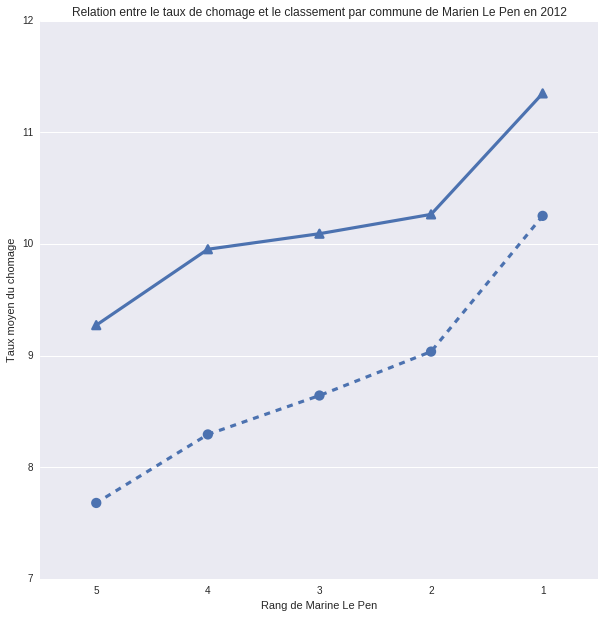

In [279]:
fig1 = plt.figure(figsize=(10, 10))

sns.pointplot(y="chomage_rate_x", x="rank_lepen", data=data_rank_stat_lepen,
              markers=["^"], linestyles=["-"]);

sns.pointplot(y="chomage_rate_old_people_x", x="rank_lepen", data=data_rank_stat_lepen,
              markers=["o"], linestyles=["--"],);


plt.gca().invert_xaxis()
plt.title("Relation entre le taux de chomage et le classement par commune de Marien Le Pen en 2012")
plt.xlabel("Rang de Marine Le Pen")
plt.ylabel("Taux moyen du chomage")
plt.show()

(0, 30)

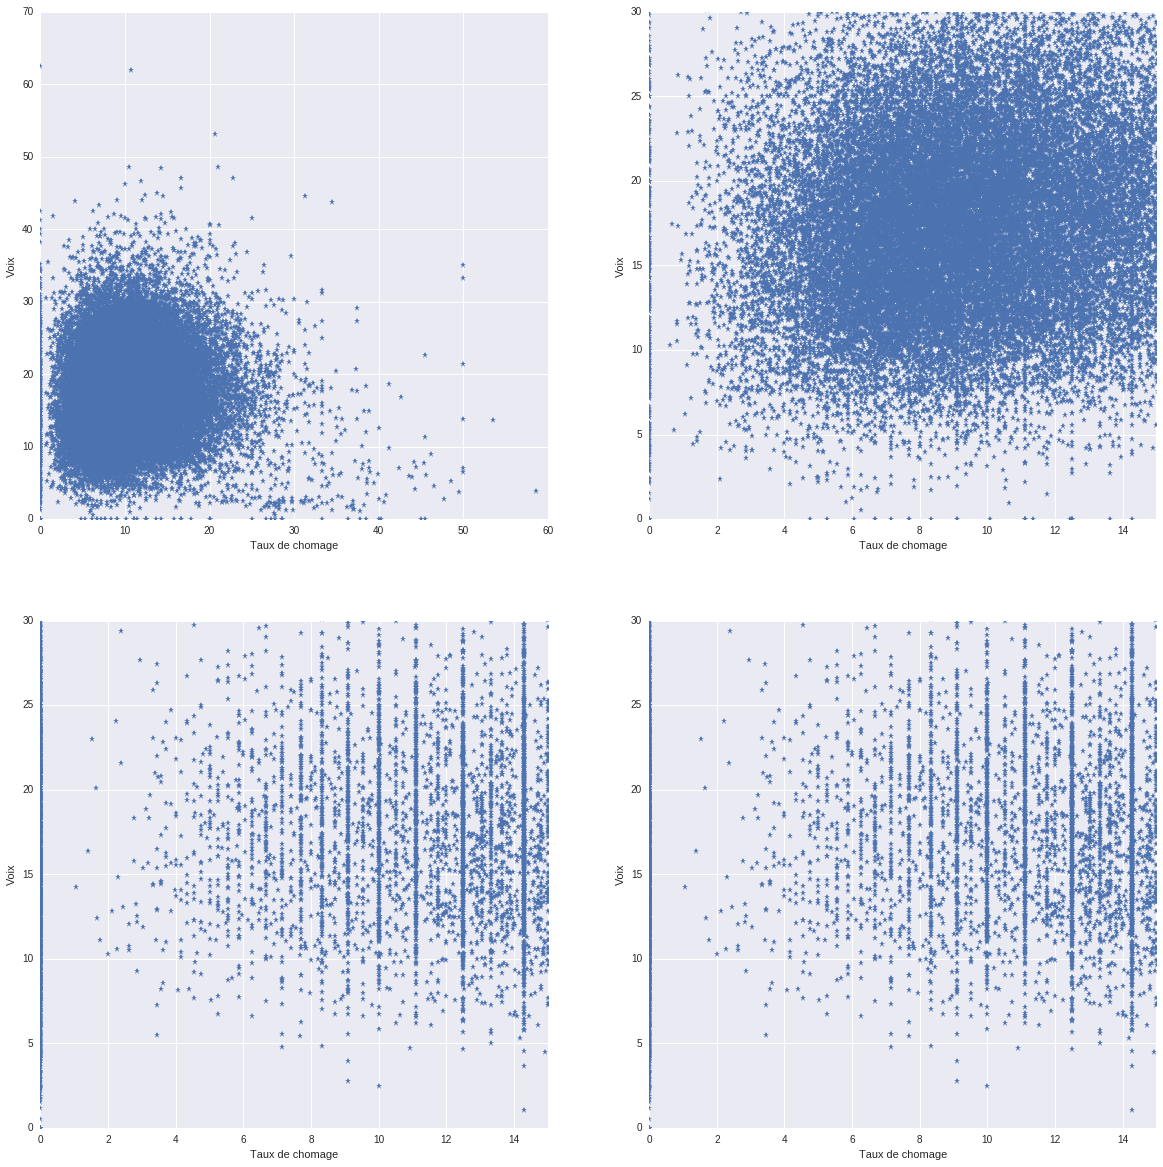

In [92]:
fig1 = plt.figure(figsize=(20, 20))

plt.subplot(221)
plt.plot(data_lepen["chomage_rate_x"],data_lepen["Voix_Ins_LEPEN"],'*')
plt.ylabel('Voix')
plt.xlabel('Taux de chomage')
plt.xlim(0,60)
plt.ylim(0,70)

plt.subplot(222)

plt.plot(data_lepen["chomage_rate_x"],data_lepen["Voix_Ins_LEPEN"],'*')
plt.ylabel('Voix')
plt.xlabel('Taux de chomage')
plt.xlim(0,15)
plt.ylim(0,30)()

plt.subplot(223)

plt.plot(data_lepen["chomage_rate_young_people_x"],data_lepen["Voix_Ins_LEPEN"],'*')
plt.ylabel('Voix')
plt.xlabel('Taux de chomage')
plt.xlim(0,15)
plt.ylim(0,30)

plt.subplot(224)

plt.plot(data_lepen["chomage_rate_young_people_x"],data_lepen["Voix_Ins_LEPEN"],'*')
plt.ylabel('Voix')
plt.xlabel('Taux de chomage')
plt.xlim(0,15)
plt.ylim(0,30)

### Approche Départements

In [101]:
#Voir la série chronologique
#http://www.bdm.insee.fr/bdm2/choixCriteres?codeGroupe=1820&codeRetour=2